# **Bootstrap Method**

#### **Learning Points**

- Define bootstrapping.
- Explain how to use bootstrapping to evaluate a model.
- Implement bootstrapping using scikit-learn.

#### **Bootstrapping**
When information about a population is unavailable, a sampling process can be simulated by drawing new samples from an existing sample. ***Bootstrapping*** is the process of generating simulated samples by repeatedly drawing with replacement from an existing sample. Bootstrap samples are often used to evaluate a statistic's ability to estimate a parameter. This is investigated by examining the distribution of simulated statistics calculated from the bootstrap samples, which are then used for interval estimates. Ex: Bootstrapping can be used to generate a confidence interval estimating the proportion of all voters who voted for the incumbent candidate using a representative sample of a few hundred exit poll interviews.

Ex. 
1. A sample is drawn from the population. Instances can be selected for the sample only once because samples are drawn from populations without replacement.
2. A bootstrap sample is generated by drawing from the existing sample. Instances can be selected multiple times because samples are drawn with replacement.
3. Bootstrapping is used to generate many samples of a fixed size. Simulated statistics can be calculated from each bootstrap sample.
4. The collection of simulated statistics form a sampling distribution that can be used to investigate the sample-to-sample variability.



#### **The bootstrap method of model evaluation**
Bootstrapping can also be used to evaluate model performance by using an error metric such as mean squared error (MSE) as the statistic of interest. The **bootstrap method of model evaluation** is a method in which repeated sampling with replacement is used to generate a distribution of errors estimating how well a model fits the overall population.

To use the bootstrap method, the size of bootstrap samples and the number of models to train must be specified beforehand. Commonly, the bootstrap sample size is the same as the size of the existing sample and the number of models to train is at least 30. As such, the bootstrap method works best for somewhat small datasets that are still large enough to be representative of the population.

#### **The bootstrap method in Python**
The command resample() can generate a bootstrap sample when replace is set to True and n_samples is set to desired size of the bootstrap samples, which is usually the same as the existing dataset. The full list of parameters can be found in scikit-learn documentation. The out-of-bag sample can be generated by taking the complement of the bootstrap sample with respect to the dataframe, which can be done by using the ~ operator on a dataframe's indices.

- Click the double right arrow icon to restart the kernel and run all cells.
- Examine the code below.
- Note the distribution of mean squared errors.

In [2]:
# Import packages and functions
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [5]:
# Load data set
badDrivers = pd.read_csv('/Users/dylanlam/Documents/GitHub/data_science_practice_and_skills/datasets/bad-drivers.csv')

In [6]:
# Create bootstrap samples and collect errors

bootstrapErrors = []
for i in range(0, 30):
    # Create the bootstrap sample and the out-of-bag sample
    boot = resample(badDrivers, replace=True, n_samples=51)
    oob = badDrivers[~badDrivers.index.isin(boot.index)]

    # Fit a linear model to the bootstrap sample
    XBoot = boot[
        ['Losses incurred by insurance companies for collisions per insured driver ($)']
    ].values.reshape(-1, 1)
    yBoot = boot[['Car Insurance Premiums ($)']].values.reshape(-1, 1)
    linModel = LinearRegression()
    linModel.fit(XBoot, yBoot)

    # Predict y values for the out-of-bag sample
    XOob = oob[
        ['Losses incurred by insurance companies for collisions per insured driver ($)']
    ].values.reshape(-1, 1)
    YOob = oob[['Car Insurance Premiums ($)']].values.reshape(-1, 1)
    YOobPredicted = linModel.predict(XOob)

    # Calculate the error
    bootError = mean_squared_error(YOob, YOobPredicted)
    bootstrapErrors.append(bootError)

In [7]:
# Calculate the mean of the errors
np.mean(bootstrapErrors)

21768.85799615594

In [8]:
# Calculate the standard deviation of the errors
np.std(bootstrapErrors)

6587.945296755116

[]

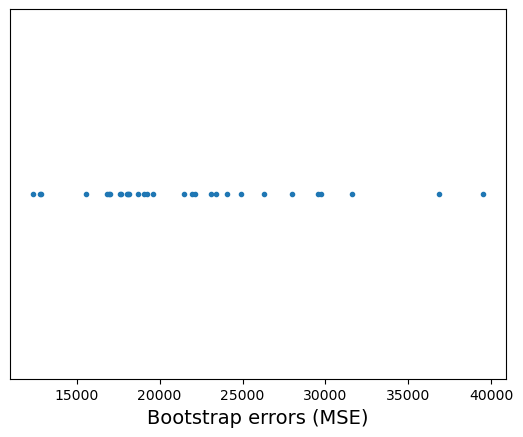

In [9]:
# Plot the errors
plt.plot(bootstrapErrors, np.zeros_like(bootstrapErrors), '.')
plt.xlabel('Bootstrap errors (MSE)', fontsize=14)
plt.gca().axes.yaxis.set_ticks([])